In [199]:
%run ./PM_functions_Units.ipynb

# Running all of the big loops here takes around 8 minutes

## Eccentricity as a function of time for various masses and cases

In [56]:
m_1 = b1_mass = np.array([1e-11, 1e-9, 1e-7, 1e-5, 1e-3])
m_2 = b2_mass = 1

SMA_bin = 1000

y = 6

# α = np.array([0.9, 0.8, 0.7, 0.6, 0.5])
α = 0.5

precession_N = np.zeros(len(m_1))
precession_EIH = np.zeros(len(m_1))
precession_1PM = np.zeros(len(m_1))
precession_2PM = np.zeros(len(m_1))

ecc_N = np.zeros((len(m_1), y - 1))
ecc_EIH = np.zeros((len(m_1), y - 1))
ecc_1PM = np.zeros((len(m_1), y - 1))
ecc_2PM = np.zeros((len(m_1), y - 1))


for i in range(len(m_1)):
    mass_bin = b1_mass[i] + b2_mass

    R_S = 2*(b1_mass[i] + b2_mass)

    v_redmass = α*np.sqrt(mass_bin/SMA_bin)
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass[i]/mass_bin)*SMA_bin,  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass[i]/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1[i], m_2

    N =  α*y# Number of "years" we want

    t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
    res = 1e5
    dt = t_max/res

    positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
    positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
    positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
    positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')

    rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
    rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
    rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
    rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])

    precession_N[i] = perihelionShift_N
    precession_EIH[i] = perihelionShift_EIH
    precession_1PM[i] = perihelionShift_1PM
    precession_2PM[i] = perihelionShift_2PM

    ecc_N[i] = eccentricity(positions_N[0])[3]
    ecc_EIH[i] = eccentricity(positions_EIH[0])[3]
    ecc_1PM[i] = eccentricity(positions_1PM[0])[3]
    ecc_2PM[i] = eccentricity(positions_2PM[0])[3]


    
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

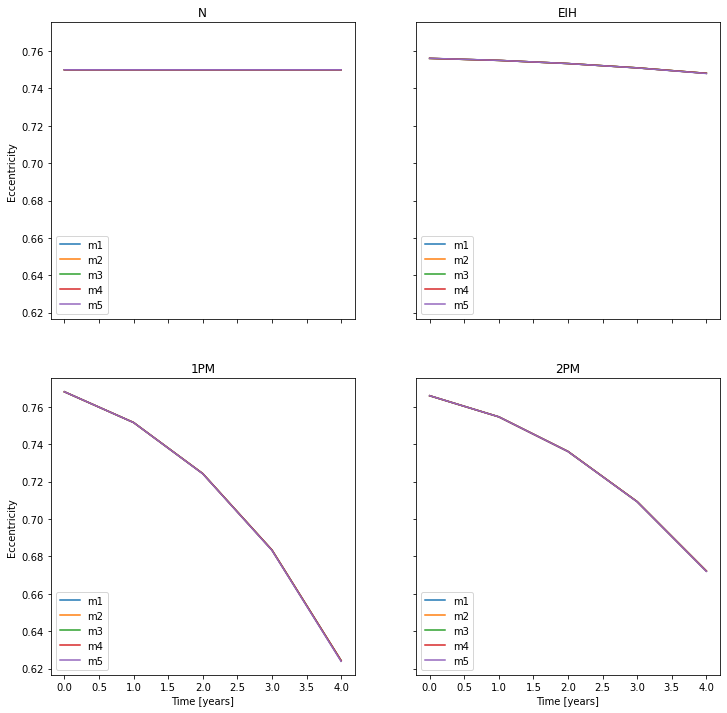

In [69]:
# Varying test-body mass of an eccentric simulation with:
#   α = 0.5, m_1 = ([1e-11, 1e-9, 1e-7, 1e-5, 1e-3]), m_2 = 1, 6 years, SMA_bin = 1000
# Below are eccentricities for each year for each mass


x = range(len(m_1))

fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = True)
axs[0,0].plot(x, ecc_N[0], label=('m1'))
axs[0,0].plot(x, ecc_N[1], label=('m2'))
axs[0,0].plot(x, ecc_N[2], label=('m3'))
axs[0,0].plot(x, ecc_N[3], label=('m4'))
axs[0,0].plot(x, ecc_N[4], label=('m5'))
axs[0,0].set_title('N')
axs[0,0].set_ylabel('Eccentricity')
axs[0,0].legend(loc='lower left')


axs[0,1].plot(x, ecc_EIH[0], label=('m1'))
axs[0,1].plot(x, ecc_EIH[1], label=('m2'))
axs[0,1].plot(x, ecc_EIH[2], label=('m3'))
axs[0,1].plot(x, ecc_EIH[3], label=('m4'))
axs[0,1].plot(x, ecc_EIH[4], label=('m5'))
axs[0,1].set_title('EIH')
axs[0,1].legend(loc='lower left')


axs[1,0].plot(x, ecc_1PM[0], label=('m1'))
axs[1,0].plot(x, ecc_1PM[1], label=('m2'))
axs[1,0].plot(x, ecc_1PM[2], label=('m3'))
axs[1,0].plot(x, ecc_1PM[3], label=('m4'))
axs[1,0].plot(x, ecc_1PM[4], label=('m5'))
axs[1,0].set_title('1PM')
axs[1,0].set_ylabel('Eccentricity')
axs[1,0].legend(loc='lower left')
axs[1,0].set_xlabel('Time [years]')


axs[1,1].plot(x, ecc_2PM[0], label=('m1'))
axs[1,1].plot(x, ecc_2PM[1], label=('m2'))
axs[1,1].plot(x, ecc_2PM[2], label=('m3'))
axs[1,1].plot(x, ecc_2PM[3], label=('m4'))
axs[1,1].plot(x, ecc_2PM[4], label=('m5'))
axs[1,1].set_title('2PM')
axs[1,1].set_xlabel('Time [years]')
axs[1,1].legend(loc='lower left')

# fig.savefig('Eccentricities(t) masses.jpg', dpi=300)





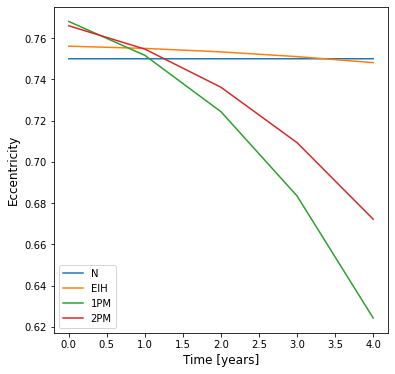

In [76]:
x = range(len(m_1))

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(x, ecc_N[2], label=('N'))
ax.plot(x, ecc_EIH[2], label=('EIH'))
ax.plot(x, ecc_1PM[2], label=('1PM'))
ax.plot(x, ecc_2PM[2], label=('2PM'))
ax.set_xlabel('Time [years]', fontsize=12)
ax.set_ylabel('Eccentricity', fontsize=12)
ax.legend(loc='lower left', fontsize=10)

# fig.savefig('Eccentricities(t).jpg', dpi=300)

In [79]:
precession_1PM*180/np.pi

array([5.1368966 , 5.1368966 , 5.13689714, 5.13695034, 5.14333182])

## Precession angle as a function of eccentricity

In [97]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

mass_bin = b1_mass + b2_mass
R_S = 2*(b1_mass + b2_mass)
SMA_bin = 1000

y = 6

α = np.array([0.9, 0.8, 0.7, 0.6, 0.5])

precession_N_2 = np.zeros(len(α))
precession_EIH_2 = np.zeros(len(α))
precession_1PM_2 = np.zeros(len(α))
precession_2PM_2 = np.zeros(len(α))

ecc_N_2 = np.zeros((len(α), y - 1))
ecc_EIH_2 = np.zeros((len(α), y - 1))
ecc_1PM_2 = np.zeros((len(α), y - 1))
ecc_2PM_2 = np.zeros((len(α), y - 1))


for i in range(len(α)):
    v_redmass = α[i]*np.sqrt(mass_bin/SMA_bin)
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1, m_2

    N =  α[i]*y# Number of "years" we want

    t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
    res = 1e5
    dt = t_max/res

    positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
    positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
    positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
    positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')

    rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
    rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
    rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
    rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])

    precession_N_2[i] = perihelionShift_N
    precession_EIH_2[i] = perihelionShift_EIH
    precession_1PM_2[i] = perihelionShift_1PM
    precession_2PM_2[i] = perihelionShift_2PM

    ecc_N_2[i] = eccentricity(positions_N[0])[3][0][0:5]
    ecc_EIH_2[i] = eccentricity(positions_EIH[0])[3][0][0:5]
    ecc_1PM_2[i] = eccentricity(positions_1PM[0])[3][0][0:5]
    ecc_2PM_2[i] = eccentricity(positions_2PM[0])[3][0][0:5]


    
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

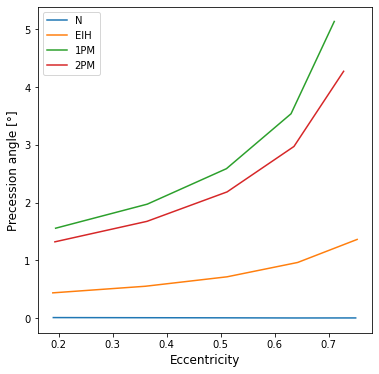

In [113]:
# Varying eccentricity of test-body simulation:
#   α = ([0.9, 0.8, 0.7, 0.6, 0.5]), m_1 = 1e-4, m_2 = 1, 6 years, SMA_bin = 1000
# Below are precessions as a function of eccentricities for each case

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.mean(ecc_N_2, axis=1), precession_N_2*180/np.pi, label=('N'))
ax.plot(np.mean(ecc_EIH_2, axis=1), precession_EIH_2*180/np.pi, label=('EIH'))
ax.plot(np.mean(ecc_1PM_2, axis=1), precession_1PM_2*180/np.pi, label=('1PM'))
ax.plot(np.mean(ecc_2PM_2, axis=1), precession_2PM_2*180/np.pi, label=('2PM'))
ax.set_xlabel('Eccentricity', fontsize=12)
ax.set_ylabel('Precession angle [°]', fontsize=12)
ax.legend(loc='upper left', fontsize=10)

# fig.savefig('Precession(eccentricity).jpg', dpi=300)





## Eccentricity failure

In [131]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

mass_bin = b1_mass + b2_mass
R_S = 2*(b1_mass + b2_mass)
SMA_bin = 100

y = 6

α = 0.5


v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2

N =  α*y# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')

rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


    
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

IndexError: index 5 is out of bounds for axis 0 with size 5

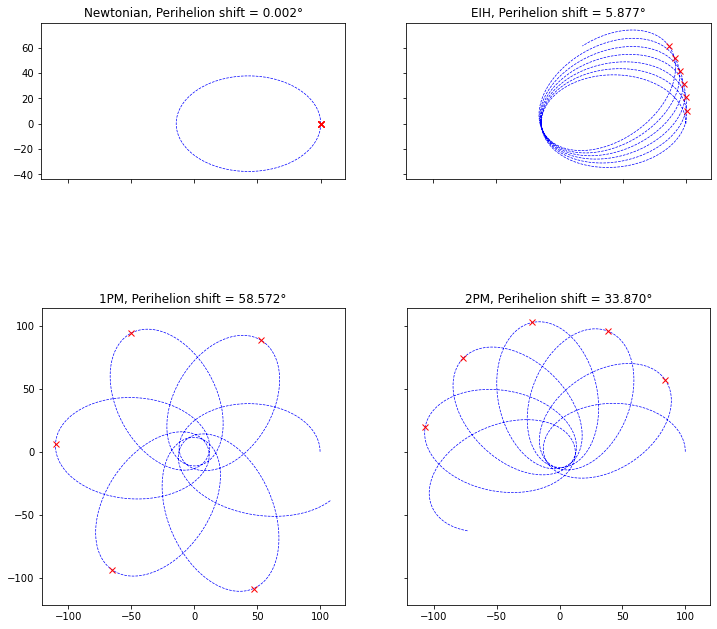

In [132]:
rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = 'row')

axs[0,0].set_aspect('equal')
axs[0,0].plot(positions_N[0,0][0:14300], positions_N[0,1][0:14300], 'b--', lw=0.7)
axs[0,0].set_title(f'Newtonian, Perihelion shift = {perihelionShift_N*180/np.pi:.3f}°')
# axs[0,0].set_ylim(-1200, 1200)

axs[0,1].set_aspect('equal')
axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].set_title(f'EIH, Perihelion shift = {perihelionShift_EIH*180/np.pi:.3f}°')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())

axs[1,0].set_aspect('equal')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].set_title(f'1PM, Perihelion shift = {perihelionShift_1PM*180/np.pi:.3f}°')

axs[1,1].set_aspect('equal')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].set_title(f'2PM, Perihelion shift = {perihelionShift_2PM*180/np.pi:.3f}°')

for i in range(len(peakPositions_EIH)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('Eccentricity COM failure.jpg', dpi=300)

    
    

## Precession angle as a function of the separation

In [200]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

mass_bin = b1_mass + b2_mass
R_S = 2*(b1_mass + b2_mass)
SMA_bin = np.array([500, 2000, 3500, 5000, 6500]) 

y = 6

α = 0.5

precession_N_2 = np.zeros(len(SMA_bin))
precession_EIH_2 = np.zeros(len(SMA_bin))
precession_1PM_2 = np.zeros(len(SMA_bin))
precession_2PM_2 = np.zeros(len(SMA_bin))

ecc_N_2 = np.zeros((len(SMA_bin), y - 1))
ecc_EIH_2 = np.zeros((len(SMA_bin), y - 1))
ecc_1PM_2 = np.zeros((len(SMA_bin), y - 1))
ecc_2PM_2 = np.zeros((len(SMA_bin), y - 1))


for i in range(len(SMA_bin)):
    v_redmass = α*np.sqrt(mass_bin/SMA_bin[i])
    x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin[i],  0])
    x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin[i],  0])
    v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
    v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

    s = x_1, x_2, v_1, v_2, m_1, m_2

    N =  α*y# Number of "years" we want

    t_max = 2*np.pi*np.sqrt(SMA_bin[i]**3/(mass_bin))*N
    res = 1e5
    dt = t_max/res

    positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
    positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
    positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
    positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')

    rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
    rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
    rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
    rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])

    precession_N_2[i] = perihelionShift_N
    precession_EIH_2[i] = perihelionShift_EIH
    precession_1PM_2[i] = perihelionShift_1PM
    precession_2PM_2[i] = perihelionShift_2PM

    ecc_N_2[i] = eccentricity(positions_N[0])[3][0][0:5]
    ecc_EIH_2[i] = eccentricity(positions_EIH[0])[3][0][0:5]
    ecc_1PM_2[i] = eccentricity(positions_1PM[0])[3][0][0:5]
    ecc_2PM_2[i] = eccentricity(positions_2PM[0])[3][0][0:5]



# 8 min at 1e5

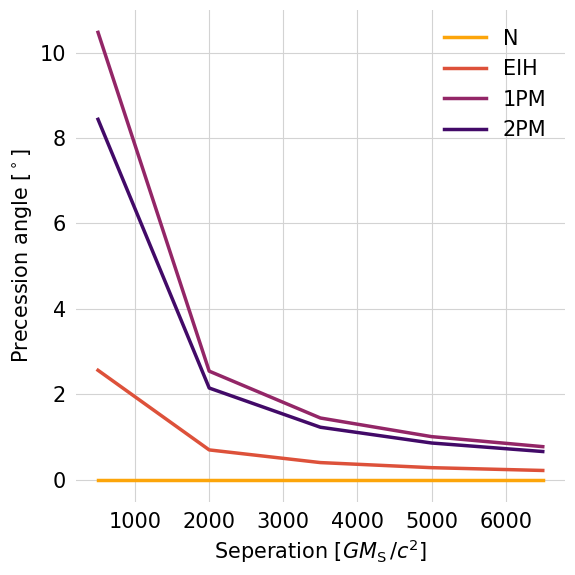

In [384]:
# Varying eccentricity of test-body simulation:
#   α = ([0.9, 0.8, 0.7, 0.6, 0.5]), m_1 = 1e-4, m_2 = 1, 6 years, SMA_bin = 1000
# Below are precessions as a function of eccentricities for each case

palette = sns.color_palette('inferno', 4).as_hex()

plt.style.use('default')
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(SMA_bin, precession_N_2*180/np.pi, color=palette[3], lw=2.5, label=('N'))
ax.plot(SMA_bin, precession_EIH_2*180/np.pi, color=palette[2], lw=2.5, label=('EIH'))
ax.plot(SMA_bin, precession_1PM_2*180/np.pi, color=palette[1], lw=2.5, label=('1PM'))
ax.plot(SMA_bin, precession_2PM_2*180/np.pi, color=palette[0], lw=2.5, label=('2PM'))
ax.set_xlabel('Distance $[G M_\mathrm{S} \,/ c^2]$')
ax.set_ylabel('Precession angle $[^\circ]$')
ax.legend(loc='upper right', frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

ax.grid(color='lightgray')

fig.tight_layout()
# fig.savefig('Precession(seperation).jpg', dpi=300)